In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [5]:
data =pd.read_csv('shopping_1.csv')
data

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Subscription Status']=le.fit_transform(data['Subscription Status'])
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3.1,1,14,3
1,2,19,1,64,3.1,1,2,3
2,3,50,1,73,3.1,1,23,6
3,4,21,1,90,3.5,1,49,6
4,5,45,1,49,2.7,1,31,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int32  
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Review Rating           3900 non-null   float64
 5   Subscription Status     3900 non-null   int32  
 6   Previous Purchases      3900 non-null   int64  
 7   Frequency of Purchases  3900 non-null   int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 198.2 KB


In [11]:
data=data[['Customer ID','Purchase Amount (USD)','Previous Purchases','Frequency of Purchases']]
data

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases
0,1,53,14,3
1,2,64,2,3
2,3,73,23,6
3,4,90,49,6
4,5,49,31,0
...,...,...,...,...
3895,3896,28,32,6
3896,3897,49,41,1
3897,3898,33,24,5
3898,3899,77,24,6


<Axes: xlabel='Frequency of Purchases', ylabel='count'>

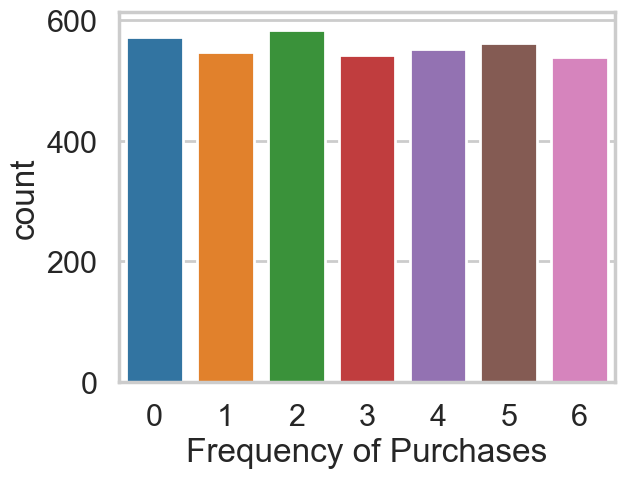

In [14]:
sns.countplot(data =data, x='Frequency of Purchases')

In [16]:
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=3)
clust.fit(data)


KMeans(n_clusters=3)

In [17]:
clust.get_params()


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Text(0, 0.5, 'Error')

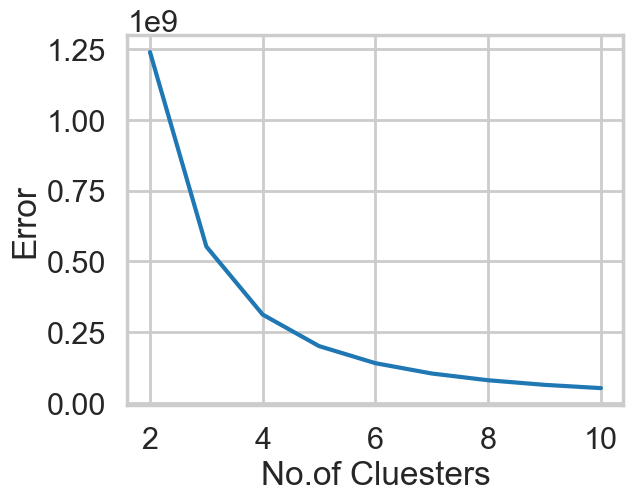

In [19]:
k=list(range(2,11))
y=[]
for i in k:
 km=KMeans(n_clusters=i,random_state=1,init='k-means++')
 km.fit(data)
 labels=km.labels_
 y.append(km.inertia_)
 
plt.plot(k,y)
plt.xlabel('No.of Cluesters')
plt.ylabel('Error')


C:\Users\Prakash Nani\AppData\Local\Temp\ipykernel_19832\3129855780.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(scaled_data)


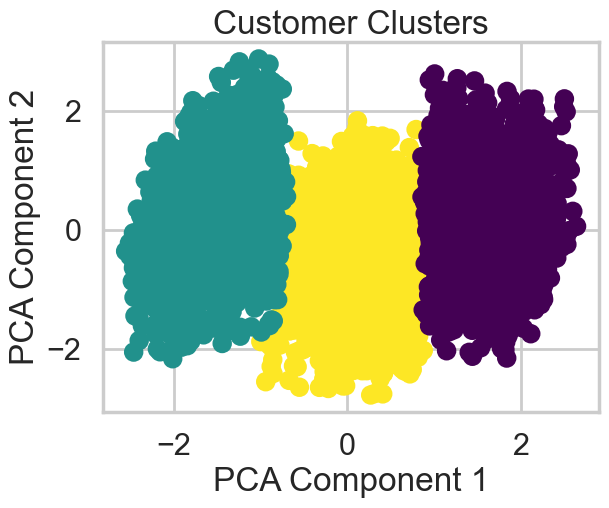

         Customer ID  Purchase Amount (USD)  Previous Purchases  \
Cluster                                                           
0        2973.864931              60.823434           22.245728   
1        1954.652731              58.792313           27.157114   
2         886.632997              59.882155           26.310606   

         Frequency of Purchases  
Cluster                          
0                      1.646054  
1                      5.068780  
2                      1.735690  


In [32]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


k = 3  


kmeans = KMeans(n_clusters=k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


cluster_means = data.groupby('Cluster').mean()


print(cluster_means)

In [20]:
from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette Score:\t',silhouette_score(data,labels))

[1 1 1 ... 0 0 0] 3900
Silhouette Score:	 0.5866427869295658


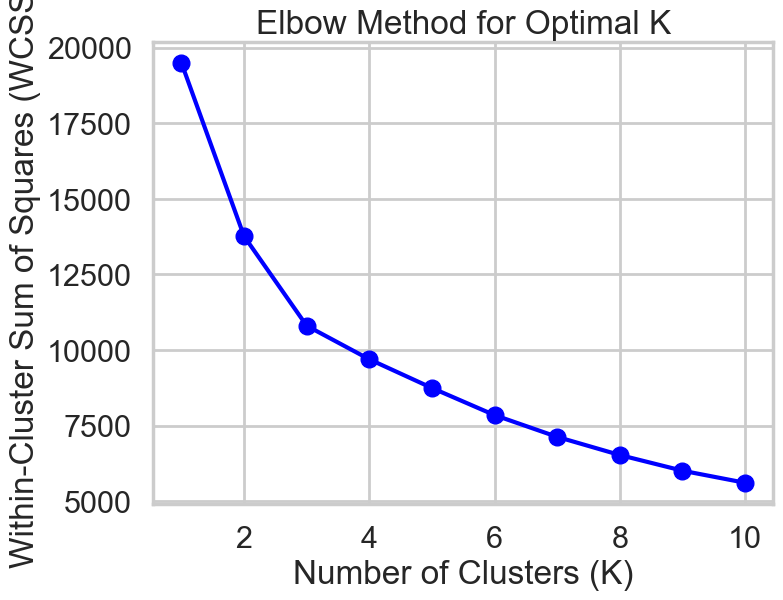

In [33]:
k_values = range(1, 11)
wcss = []  # Within-cluster sum of squares

# Calculate the WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()